In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image: Early-Blight-927-_JPG.rf.bacf7f9d43489166ed2c349aac37dca6.jpg


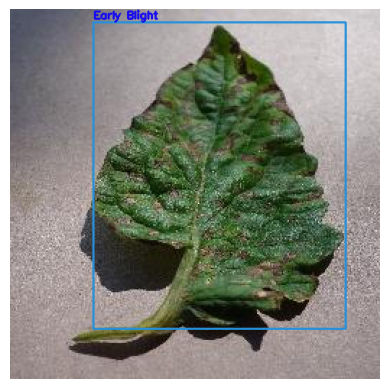

Image: Yellow-Leaf-Curl-Virus-686-_JPG.rf.b9043be34a6ffe056f37c5eca084d50e.jpg


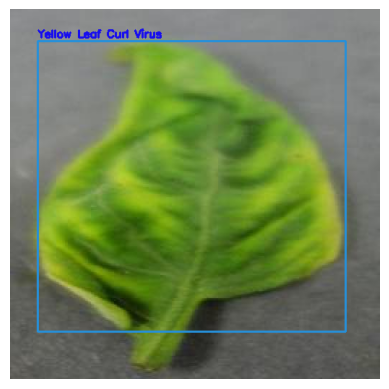

Image: V006_77_1_18_11_03_13_1_9720w_20200918_10_jpg.rf.b890b3e1f7f4d327f75e9a50876cbeb8.jpg


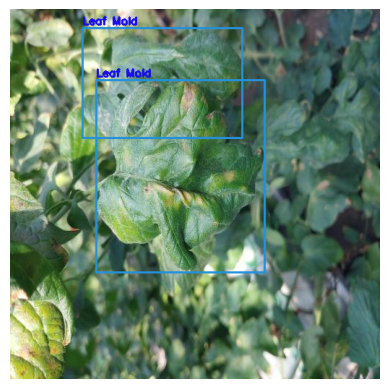

Image: Septoria-Leaf-Spot-328-_JPG.rf.c2b12a405d63930740fef77b8596d075.jpg


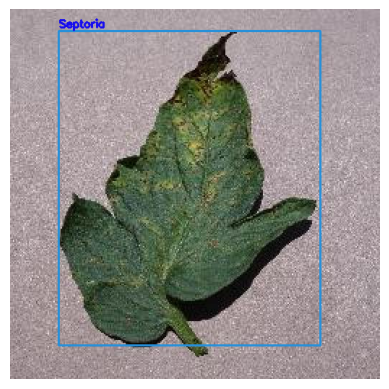

Image: a91426e9-ff5c-4b53-8d08-b3a0e0fcb6e8___UF-GRC_BS_Lab-Leaf-9004_JPG.rf.9dcd2d4b6e3081e325de814ab5d2a2be.jpg


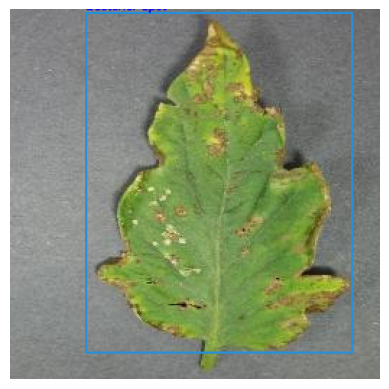

In [2]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt

# Function to visualize bounding boxes on an image
def visualize_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    try:
        annotations = pd.read_csv(annotation_path, delimiter=' ', header=None)
    except pd.errors.EmptyDataError:
        print(f'{annotation_path}, " is empty')

    for _, row in annotations.iterrows():
        class_label = row[0]
        class_label = class_labels[int(class_label)]
        x_center, y_center, width, height = row[1:].values
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (218, 144, 38), 2)
        cv2.putText(image, str(class_label), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (239, 13, 23), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

images_dir = '/content/drive/MyDrive/Tomato-YOLO v8/test/images'
annot_dir = '/content/drive/MyDrive/Tomato-YOLO v8/test/labels'

class_labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Leaf Mold', 'Leaf_Miner', 'Mosaic Virus', 'Septoria', 'Spider Mites', 'Yellow Leaf Curl Virus']

image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

random_images = random.sample(image_files, 5)

for image_file in random_images:
    image_path = os.path.join(images_dir, image_file)
    annotation_path = os.path.join(annot_dir, image_file.replace('.jpg', '.txt'))

    print("Image:", image_file)
    visualize_bounding_boxes(image_path, annotation_path, class_labels)

In [3]:
class_labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Leaf Mold', 'Leaf_Miner', 'Mosaic Virus', 'Septoria', 'Spider Mites', 'Yellow Leaf Curl Virus']

labels_dir = '/content/drive/MyDrive/Tomato-YOLO v8/test/labels'

annotation_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

class_counts = {label: 0 for label in class_labels}
empty_files = []

for annotation_file in annotation_files:
    annotation_path = os.path.join(labels_dir, annotation_file)
    try:
        annotations = pd.read_csv(annotation_path, delimiter=' ', header=None)
    except pd.errors.EmptyDataError:
        empty_files.append(annotation_file)

    for class_label in annotations[0]:
        class_counts[class_labels[class_label]] += 1

In [4]:
print("Label Distribution:")
for class_label, count in class_counts.items():
    print(f"{class_label}: {count} instances")

Label Distribution:
Bacterial Spot: 105 instances
Early Blight: 164 instances
Healthy: 650 instances
Late Blight: 87 instances
Leaf Mold: 320 instances
Leaf_Miner: 126 instances
Mosaic Virus: 28 instances
Septoria: 91 instances
Spider Mites: 134 instances
Yellow Leaf Curl Virus: 119 instances


In [5]:
print(f'There are {len(empty_files) } empty files')

There are 0 empty files


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 23.9 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

numpy               ✅ 1.26.4<2.0.0,>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.1+cu121>=1.8.0
torchvision         ✅ 0.19.1+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.8>=2.0.0
torch               ✅ 2.4.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"


In [ ]:
!wandb disabled

/bin/bash: line 1: wandb: command not found


In [8]:
!yolo detect train model=yolov8n.pt data=/content/drive/MyDrive/Tomato/data.yaml epochs=100 imgsz=640 batch=-1

100% 6.25M/6.25M [00:00<00:00, 99.4MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Tomato/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [9]:
import matplotlib.image as mpimg

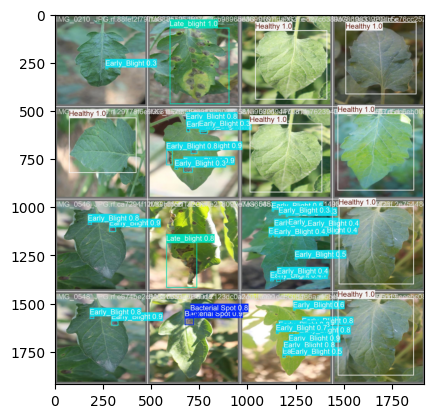

In [10]:
img = mpimg.imread('/content/runs/detect/train/val_batch0_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#infer = YOLO('/content/runs/detect/train/weights/best.pt')

In [11]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf = 0.4 source = "/content/drive/MyDrive/Tomato/test/images" save = True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

image 1/31 /content/drive/MyDrive/Tomato/test/images/IMG_0219_JPG.rf.c8d288f364390a28656a50ed7415713a.jpg: 640x640 1 Healthy, 7.5ms
image 2/31 /content/drive/MyDrive/Tomato/test/images/IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce5659a.jpg: 640x640 3 Early_Blights, 1 black spot, 7.5ms
image 3/31 /content/drive/MyDrive/Tomato/test/images/IMG_0249_JPG.rf.412df0b52b549fc121a346eb8a957ab0.jpg: 640x640 1 Early_Blight, 7.5ms
image 4/31 /content/drive/MyDrive/Tomato/test/images/IMG_0277_JPG.rf.84073f240decbc79e30716373f3dd507.jpg: 640x640 3 Early_Blights, 1 Leaf Mold, 1 black spot, 9.3ms
image 5/31 /content/drive/MyDrive/Tomato/test/images/IMG_0281_JPG.rf.a29c913abceeed1ea6092ab0f2c92b0d.jpg: 640x640 3 Early_Blights, 1 Leaf Mold, 1 black spot, 7.5ms
image 6/31 /content/drive/MyDrive/Tomato/test/images/IMG_0288_JPG.rf.ca824ec09b

In [12]:
#infer.predict('/content/drive/MyDrive/Tomato/test/images', save = True)

In [13]:
from glob import glob
from PIL import Image

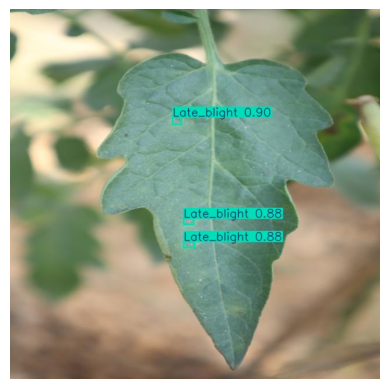

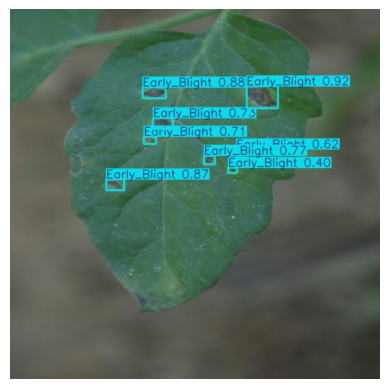

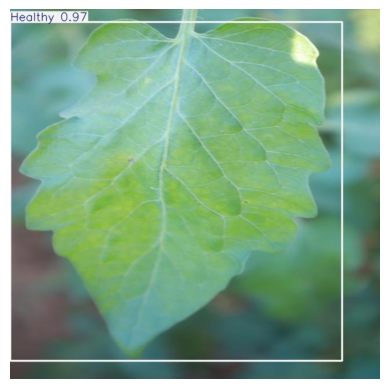

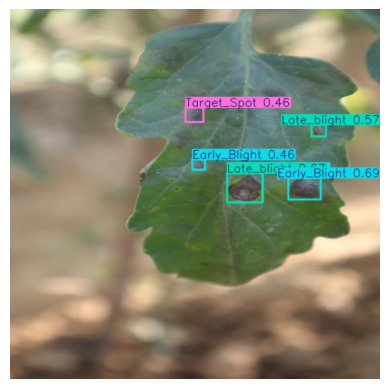

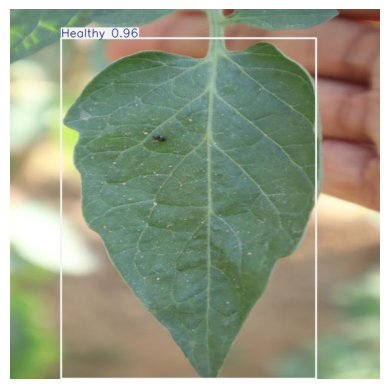

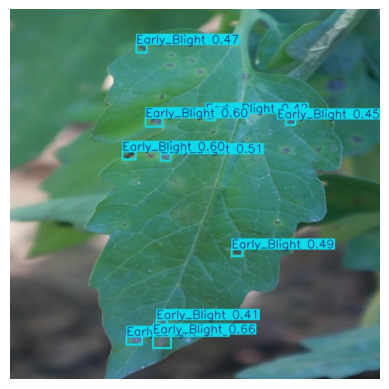

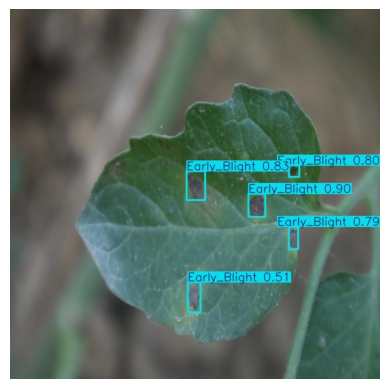

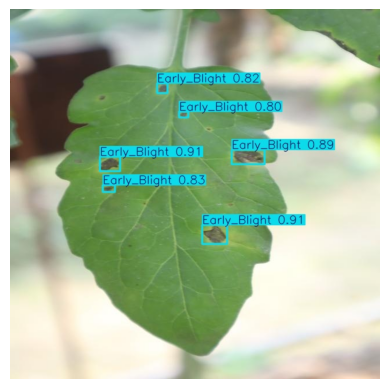

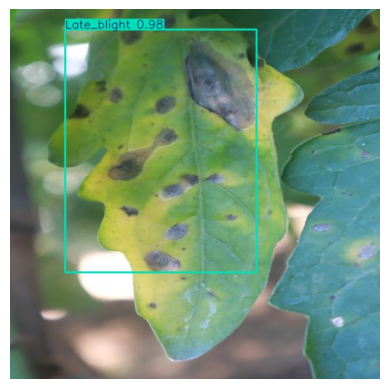

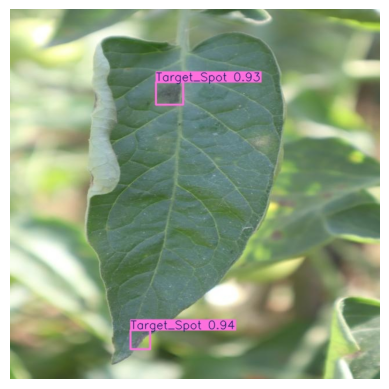

In [17]:
for image_path in glob(f'/content/runs/detect/predict/*.jpg')[10:20]:
      plt.imshow(Image.open(image_path)); plt.axis("off"); plt.show()
      print("\n")